In [ ]:
import os
import glob


*   **The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules.**
*   **The glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules**



Figure. OS methods summary
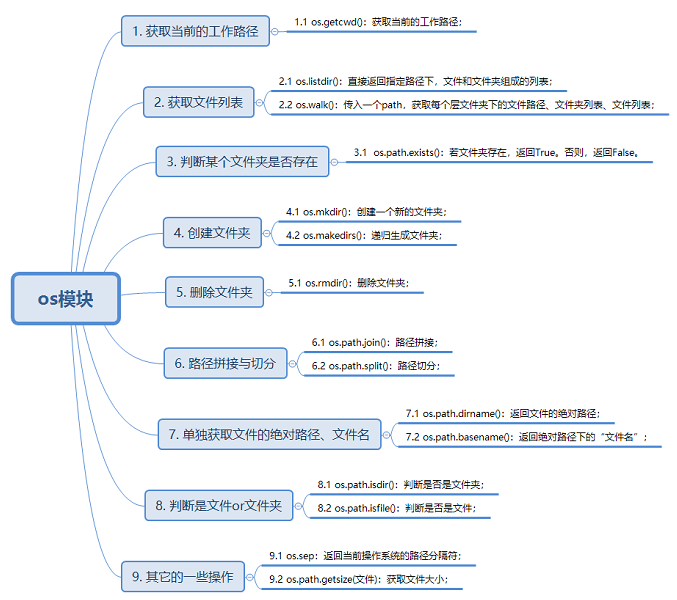

## 1. os.getcwd

get the current working directory (CWD)

In [ ]:
cwd = os.getcwd()
print('Current working directory:', cwd)

Current working directory: /content


## 2(1). os.mkdir()
## 2(2) os.makedirs()


*   os.mkdir() is used to create a directory. This method raises FileExistsError if the directory to be created already exists.
*   os.makedirs() is used to create a directory recursively. 





In [ ]:
os.mkdir('test_folder1')
path = os.path.join('./test_folder2', 'sub_folder2-1')
os.makedirs(path)

## 3(1) os.remove()
## 3(2) os.rmdir()
## 3(3) os.path.exists

*   os.remove() is used to remove or delete a file path. 
*   os.rmdir() method in Python is used to remove or delete an empty directory. 
*   os.path.exists() method is used to check either file or directory exists



 

In [ ]:
isExist = os.path.exists('./test_folder1') 
if isExist:
    os.rmdir('./test_folder1')

isExist = os.path.exists('./test_folder2/sub_folder2-1')
if isExist:
    os.rmdir('./test_folder2/sub_folder2-1')
    os.rmdir('./test_folder2')


## 4. os.listdir()
* os.listdir() which lists all filenames and directories in a given folder path
* get the file path with the os.path.join() function, since os.listdir() only returns the names. 
* To get the absolute path from a relative path you can additionally use the os.path.abspath().

In [ ]:
# !rm -rf test_folder

# Create a directory and several files for testing
os.mkdir('test_folder')
os.makedirs(os.path.join('test_folder', 'sub_folder1'))
with open('./test_folder/test1.txt', 'w+') as f:
    f.write("test1 txt")
with open('./test_folder/test2.txt', 'w+') as f:
    f.write("test2 txt")
with open('./test_folder/sub_folder1/test1.txt', 'w+') as f:
    f.write("sub folder test1 txt")


# os.listdir() returns the directory and file names under this folder
dir_names = os.listdir('test_folder') 
print(dir_names)

# Combine the path and name using slash in Linux or a backslash in Windows is OK
# But os.path.join() function makes sure that the code works platform-independently
dir_paths = [os.path.join('test_folder', f) for f in os.listdir('test_folder')]
print(dir_paths)

['test1.txt', 'sub_folder1', 'test2.txt']
['test_folder/test1.txt', 'test_folder/sub_folder1', 'test_folder/test2.txt']


## 5. os.walk()
*  get all files and directories recursively
* os.walk() function generates the file names in a directory tree by walking the tree either top-down or bottom-up.
* walk the file tree bottom up by adding the argument topdown=False to the os.walk()
* the os.walk() function uses os.scandir() in the background to increase the speed quite significantly. 

In [ ]:
for (dir_path, dir_names, file_names) in os.walk('./test_folder'):
    # print('dir path: ', dir_path)
    # print('dir names: ', dir_names)
    # print('file names: ', file_names)
    for f in file_names:
        print('FILE:', os.path.join(dir_path, f))

FILE: ./test_folder/test1.txt
FILE: ./test_folder/test2.txt
FILE: ./test_folder/sub_folder1/test1.txt


## 6. glob.glob()
Another module that we can use to traverse the file system is the glob module.

In [ ]:
files1 = glob.glob('./test_folder/*.txt', recursive = True)
print(files1)

# When recursive is set True, './**/' will match any files or directories.
files2 = glob.glob('./test_folder/**/*.txt', recursive = True)
print(files2)

['./test_folder/test1.txt', './test_folder/test2.txt']
['./test_folder/test1.txt', './test_folder/test2.txt', './test_folder/sub_folder1/test1.txt']


In [ ]:
# pattern matching
for name in glob.glob('test_folder/*'):
    print("Fit pattern1: ", name)

for name in glob.glob('test_folder/*[0-9].*'): 
    print("Fit pattern2: ", name)

Fit pattern1:  test_folder/test1.txt
Fit pattern1:  test_folder/sub_folder1
Fit pattern1:  test_folder/test2.txt
Fit pattern2:  test_folder/test1.txt
Fit pattern2:  test_folder/test2.txt
